### Author: Tejas J

# K-Nearest Neighbors (KNN)

## Predicting Breast Cancer:

 In this project, we will be using the Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Repository. We will be training a K-Nearest Neighbor algorithm to predict whether a cell is Benign or Malignant.






Description – Sample data is available at https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

The dataset has 10 attributes listed below

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv("F:\datasets\wisc_bc_data.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         13.50          15.64            86.97       549.1            0.1385   
1         11.88          22.94            78.28       424.8            0.1213   
2         12.41          26.44            79.93       471.4            0.1369   
3         11.92          15.77            76.53       434.0            0.1367   
4         16.20          15.73           104.50       819.1            0.1126   

   compactness_worst  concavity_worst  points_worst  symmetry_worst  \
0             0.1266          0.12420       0.09391          0.2827   
1             0.2515          0.19160       0.07926          0.2940   
2             0.1482          0.10670       0.07431          0.2998   
3             0.1822          0.08669       0.08611          0.2102   
4             0.1737          0.13620       0.08178          0.2487   

   dimension_worst  
0          0.06771  
1          0.07587  
2          0.07881  
3          0.06784  
4          0.06766  

[5 rows x 32 columns]

In [4]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B        12.32         12.39           78.85   
1      8910251         B        10.60         18.95           69.28   
2       905520         B        11.04         16.83           70.92   
3       868871         B        11.28         13.39           73.00   
4      9012568         B        15.19         13.21           97.65   
..         ...       ...          ...           ...             ...   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280           0.06981         0.03987   
1        346.4          0.09688           0.11470         0.06387   
2        373.2          0.10770           0.07804         0.03046   
3        384.8          0.11640           0.11360         0.04635   
4        711.8          0.07963           0.06934         0.03393   
..         ...              ...               ...             ...   
564      537.3          0.07466           0.05994         0.04859   
565      321.6          0.09882           0.09159         0.03581   
566      710.6          0.09057           0.10520         0.05375   
567      644.2          0.10990           0.09242         0.06895   
568     1386.0          0.10010           0.15150         0.19320   

     points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0        0.03700  ...         13.50          15.64            86.97   
1        0.02642  ...         11.88          22.94            78.28   
2        0.02480  ...         12.41          26.44            79.93   
3        0.04796  ...         11.92          15.77            76.53   
4        0.02657  ...         16.20          15.73           104.50   
..           ...  ...           ...            ...              ...   
564      0.02870  ...         14.90          23.89            95.10   
565      0.02037  ...         10.88          19.48            70.89   
566      0.03263  ...         17.80          28.03           113.80   
567      0.06495  ...         15.80          16.93           103.10   
568      0.12550  ...         22.69          21.84           152.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         549.1            0.1385             0.1266          0.12420   
1         424.8            0.1213             0.2515          0.19160   
2         471.4            0.1369             0.1482          0.10670   
3         434.0            0.1367             0.1822          0.08669   
4         819.1            0.1126             0.1737          0.13620   
..          ...               ...                ...              ...   
564       687.6            0.1282             0.1965          0.18760   
565       357.1            0.1360             0.1636          0.07162   
566       973.1            0.1301             0.3299          0.36300   
567       749.9            0.1347             0.1478          0.13730   
568      1535.0            0.1192             0.2840          0.40240   

     points_worst  symmetry_worst  dimension_worst  
0         0.09391          0.2827          0.06771  
1         0.07926          0.2940          0.07587  
2         0.07431          0.2998          0.07881  
3         0.08611          0.2102          0.06784  
4         0.08178          0.2487          0.06766  
..            ...             ...              ...  
564       0.10450          0.2235          0.06925  
565       0.04074          0.2434          0.08488  
566       0.12260          0.3175          0.09772  
567       0.10690          0.2606          0.07810  
568       0.19660

In [5]:
df.shape

(569, 32)

In [6]:
df['diagnosis']

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [7]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [8]:
df['diagnosis']

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [9]:
df.describe().transpose()

count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se       569.0  2.866059e+00  2.021855e+00     0.757000   
area_se            569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se      569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se     569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se       569.0  3.189372e-02  3.018606e-02     0.000000   
points_se          569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se        569.0  2.054230e-02  8.266372e-03     0.007882   
dimension_se       569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst       569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst      569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst    569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst         569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst   569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst  569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst    569.0  2.721885e-01  2.086243e-01     0.000000   
points_worst       569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst     569.0  2.900756e-01  6.186747e-02     0.156500   
dimension_worst    569.0  8.394582e-02  1.806127e-02     0.055040   

                             25%            50%           75%           max  
id                 869218.000000  906024.000000  8.813129e+06  9.113205e+08  
radius_mean            11.700000      13.370000  1.578000e+01  2.811000e+01  
texture_mean           16.170000      18.840000  2.180000e+01  3.928000e+01  
perimeter_mean         75.170000      86.240000  1.041000e+02  1.885000e+02  
area_mean             420.300000     551.100000  7.827000e+02  2.501000e+03  
smoothness_mean         0.086370       0.095870  1.053000e-01  1.634000e-01  
compactness_mean        0.064920       0.092630  1.304000e-01  3.454000e-01  
concavity_mean          0.029560       0.061540  1.307000e-01  4.268000e-01  
points_mean             0.020310       0.033500  7.400000e-02  2.012000e-01  
symmetry_mean           0.161900       0.179200  1.957000e-01  3.040000e-01  
dimension_mean          0.057700       0.061540  6.612000e-02  9.744000e-02  
radius_se               0.232400       0.324200  4.789000e-01  2.873000e+00  
texture_se              0.833900       1.108000  1.474000e+00  4.885000e+00  
perimeter_se            1.606000       2.287000  3.357000e+00  2.198000e+01  
area_se                17.850000      24.530000  4.519000e+01  5.422000e+02  
smoothness_se           0.005169       0.006380  8.146000e-03  3.113000e-02  
compactness_se          0.013080       0.020450  3.245000e-02  1.354000e-01  
concavity_se            0.015090       0.025890  4.205000e-02  3.960000e-01  
points_se               0.007638       0.010930  1.471000e-02  5.279000e-02  
symmetry_se             0.015160       0.018730  2.348000e-02  7.895000e-02  
dimension_se            0.002248       0.003187  4.558000e-03  2.984000e-02  
radius_worst           13.010000      14.970000  1.879000e+01  3.604000e+01  
texture_worst   

In [10]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

dropping ID, since it has no impact on our prediction of whether a cell is B or M

In [11]:
df = df.drop(labels = "id", axis = 1)

Creating a dependent(y) and independent(X) variables

In [12]:
X = df.drop(labels= "diagnosis" , axis = 1)
y = df["diagnosis"]
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.05955  ...         13.50          15.64            86.97   
1         0.06491  ...         11.88          22.94            78.28   
2         0.06340  ...         12.41          26.44            79.93   
3         0.06072  ...         11.92          15.77            76.53   
4         0.05544  ...         16.20          15.73           104.50   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       549.1            0.1385             0.1266          0.12420   
1       424.8            0.1213             0.2515          0.19160   
2       471.4            0.1369             0.1482          0.10670   
3       434.0            0.1367             0.1822          0.08669   
4       819.1            0.1126             0.1737          0.13620   

   points_worst  symmetry_worst  dimension_worst  
0       0.09391          0.2827          0.06771  
1       0.07926          0.2940          0.07587  
2       0.07431          0.2998          0.07881  
3       0.08611          0.2102          0.06784  
4       0.08178          0.2487          0.06766  

[5 rows x 30 columns]

## Scaling our data in order to have a common scale of measurement for the attributes

In [15]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale. NB: Y is a categorical variable which doesn't need to be scaled

In [16]:
XScaled.describe() #note below that we now have a common STD for all of the attributes showing a common variability.

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.162905e-16 -7.373520e-16   -1.303390e-16 -2.239958e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean   points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02  5.690000e+02   
mean      1.598019e-16      1.730699e-16    3.707247e-17 -5.775501e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00  1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00 -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01 -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01 -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01  6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00  3.927930e+00   

       symmetry_mean  dimension_mean  ...  radius_worst  texture_worst  \
count   5.690000e+02    5.690000e+02  ...  5.690000e+02   5.690000e+02   
mean    1.449729e-16   -1.523630e-15  ... -8.507157e-17   6.634022e-18   
std     1.000880e+00    1.000880e+00  ...  1.000880e+00   1.000880e+00   
min    -2.744117e+00   -1.819865e+00  ... -1.726901e+00  -2.223994e+00   
25%    -7.032397e-01   -7.226392e-01  ... -6.749213e-01  -7.486293e-01   
50%    -7.162650e-02   -1.782793e-01  ... -2.690395e-01  -4.351564e-02   
75%     5.307792e-01    4.709834e-01  ...  5.220158e-01   6.583411e-01   
max     4.484751e+00    4.910919e+00  ...  4.094189e+00   3.885905e+00   

       perimeter_worst    area_worst  smoothness_worst  compactness_worst  \
count     5.690000e+02  5.690000e+02      5.690000e+02       5.690000e+02   
mean     -3.570665e-16 -1.888745e-16     -2.265323e-16      -4.487720e-18   
std       1.000880e+00  1.000880e+00      1.000880e+00       1.000880e+00   
min      -1.693361e+00 -1.222423e+00     -2.682695e+00      -1.443878e+00   
25%      -6.895783e-01 -6.421359e-01     -6.912304e-01      -6.810833e-01   
50%      -2.859802e-01 -3.411812e-01     -4.684277e-02      -2.695009e-01   
75%       5.402790e-01  3.575891e-01      5.975448e-01       5.396688e-01   
max       4.287337e+00  5.930172e+00      3.955374e+00       5.112877e+00   

       concavity_worst  points_worst  symmetry_worst  dimension_worst  
count     5.690000e+02  5.690000e+02    5.690000e+02     5.690000e+02  
mean      9.112024e-17  2.302396e-16    2.718973e-16     1.882891e-16  
std       1.000880e+00  1.000880e+00    1.000880e+00     1.000880e+00  
min      -1.305831e+00 -1.745063e+00   -2.160960e+00    -1.601839e+00  
25%      -7.565142e-01 -7.563999e-01   -6.418637e-01    -6.919118e-01  
50%      -2.182321e-01 -2.234689e-01   -1.274095e-01    -2.164441e-01  
75%       5.311411e-01  7.125100e-01    4.501382e-01     4.507624e-01  
max       4.700669e+00  2.685877e+00    6.046041e+00     6.846856e+00  

[8 rows x 30 columns]

In [17]:
XScaled_df=pd.DataFrame(XScaled)

In [18]:
XScaled_df.head()


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -0.513297     -1.605595       -0.540376  -0.542624         0.458285   
1    -1.001801     -0.079038       -0.934566  -0.877375         0.036986   
2    -0.876835     -0.572377       -0.867014  -0.801153         0.806996   
3    -0.808671     -1.372888       -0.781338  -0.768161         1.426135   
4     0.301824     -1.414775        0.234000   0.161860        -1.190618   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0         -0.654413       -0.614306    -0.307442       0.538081   
1          0.196319       -0.312987    -0.580343       0.402996   
2         -0.498443       -0.732448    -0.622129      -0.356400   
3          0.175472       -0.532950    -0.024740      -0.148296   
4         -0.663320       -0.688883    -0.576473      -0.330843   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       -0.460382  ...     -0.573451      -1.634499        -0.604391   
1        0.299453  ...     -0.908925      -0.445740        -0.863230   
2        0.085395  ...     -0.799171       0.124213        -0.814083   
3       -0.294523  ...     -0.900641      -1.613330        -0.915355   
4       -1.043018  ...     -0.014328      -1.619844        -0.082245   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0   -0.582718          0.268776          -0.812128        -0.709978   
1   -0.801227         -0.485202          -0.017590        -0.386625   
2   -0.719308          0.198638          -0.674722        -0.793935   
3   -0.785054          0.189871          -0.458434        -0.889933   
4   -0.108082         -0.866574          -0.512506        -0.652408   

   points_worst  symmetry_worst  dimension_worst  
0     -0.315133       -0.119321        -0.899721  
1     -0.538203        0.063489        -0.447528  
2     -0.613574        0.157320        -0.284606  
3     -0.433901       -1.292212        -0.892517  
4     -0.499832       -0.669366        -0.902492  

[5 rows x 30 columns]

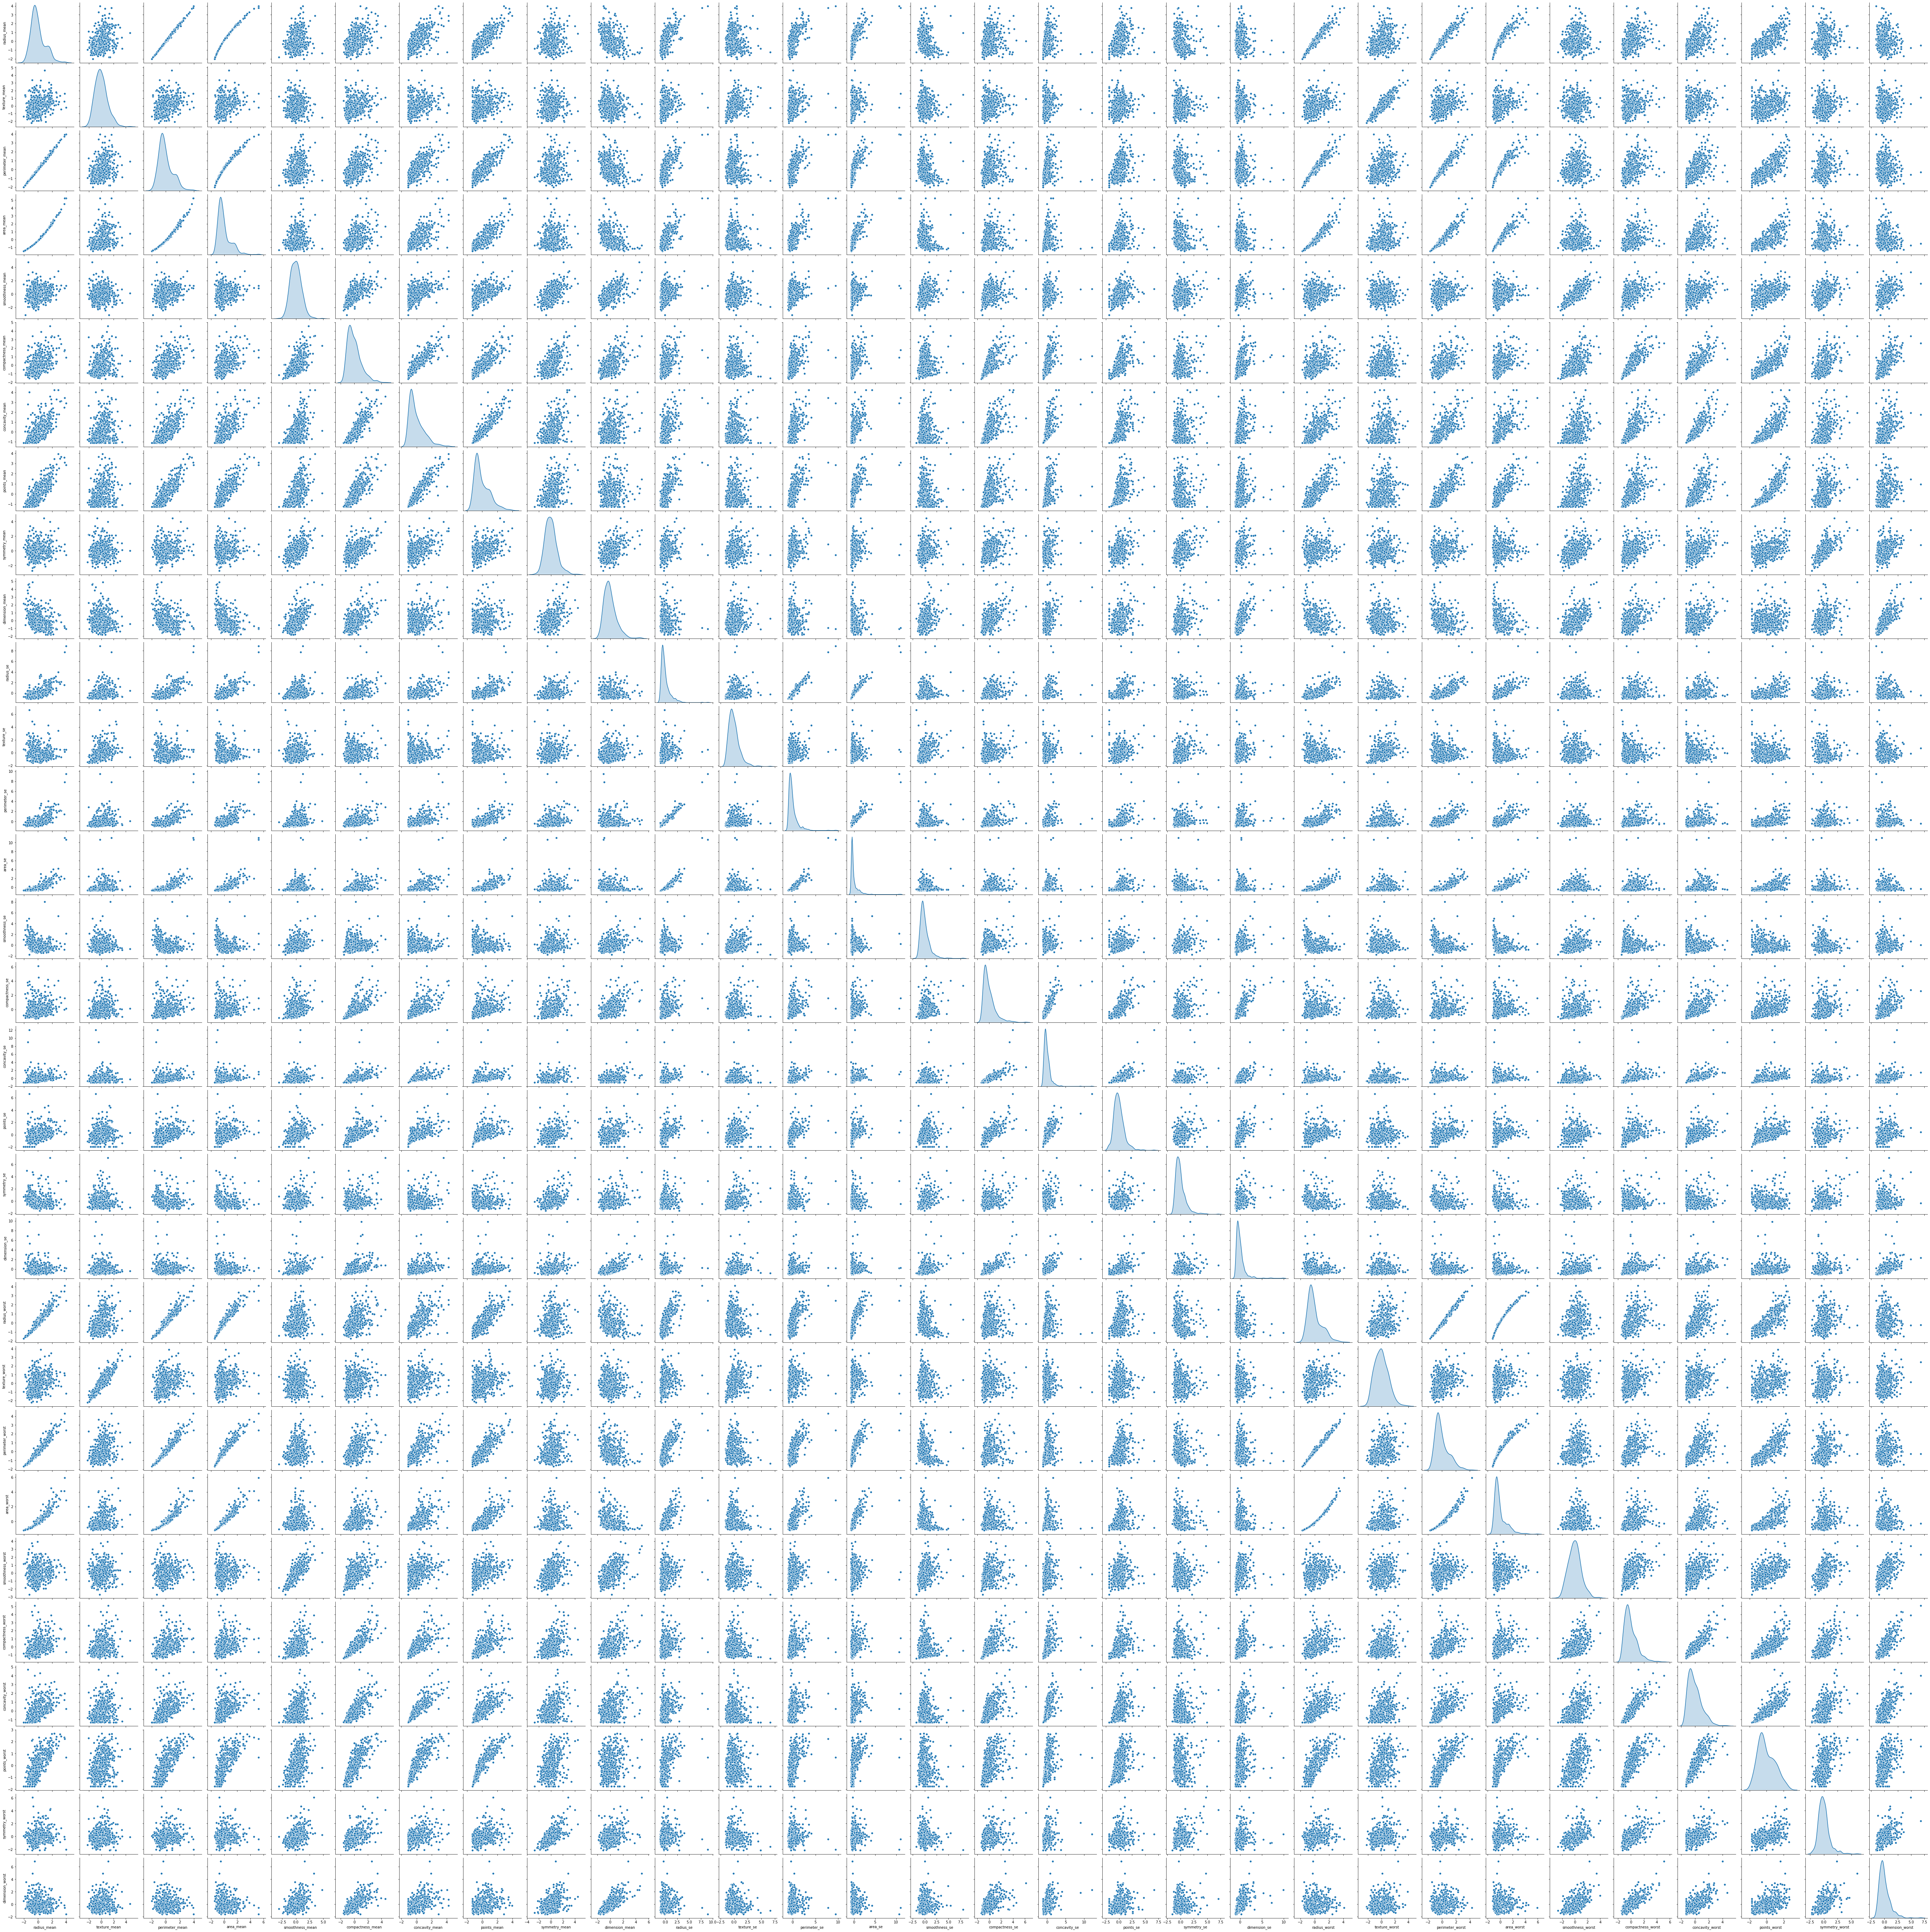

In [19]:
sns.pairplot(XScaled_df, diag_kind ='kde')
plt.show()

# Building Our kNN Model

### Splitting the data into training and test set 70:30

In [20]:
X_train, X_test, y_train, y_test = train_test_split(XScaled_df, y, test_size=0.30, random_state=1)

In [21]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [22]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Evaluate Performance of kNN Model

In [23]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9649122807017544

## confusion matrix

Confusion Matrix


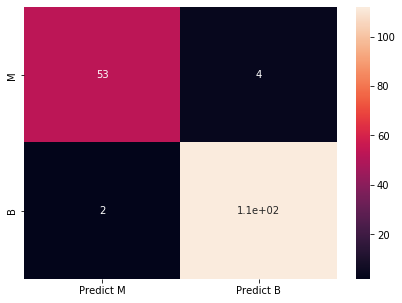

In [24]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [25]:
len(y_train)

398

# How to Choose the K-Value

If K is very small, it ends up overfitting the training data and performing extremely bad or underfitting the testing data. Ont he other hand, if K is very large, it ends up predicting the class that is most frequent, or dominant and you get same predictions over and over again.

one way to deal with this is a suggested approach of setting k=sqrt(n), where n equals the lenght of y_train

In [26]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

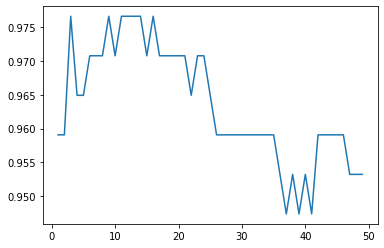

In [27]:
plt.plot(range(1,50),scores)


In [28]:
from sklearn.model_selection import cross_val_score


accuracy_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,XScaled_df,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

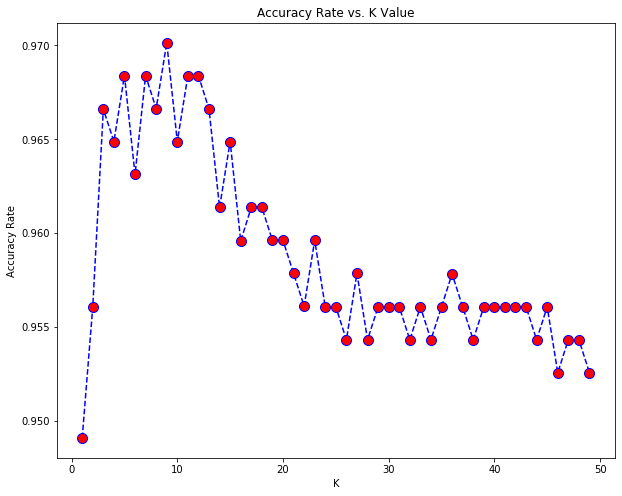

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [30]:
NNH_2 = KNeighborsClassifier(n_neighbors= 8 , weights = 'distance' )

In [31]:
NNH_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [32]:
predicted_labels = NNH_2.predict(X_test)
NNH_2.score(X_test, y_test)

0.9707602339181286